## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [7]:
import os
from tensorflow.keras import backend
import tensorflow.keras as keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"

In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [11]:


# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(x_train.shape, x_test.shape)

(50000, 3072) (10000, 3072)


In [12]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_train = x_train[:1000]
x_test = x_test[:1000]
y_train = y_train[:1000]
y_test = y_test[:1000]

In [16]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 1000 samples, validate on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 511us/step - loss: 0.4983 - acc: 0.8080 - val_loss: 1.8909 - val_acc: 0.5170
Epoch 2/100
1000/1000 [==============================] - 1s 708us/step - loss: 0.3785 - acc: 0.8680 - val_loss: 1.9397 - val_acc: 0.5160
Epoch 3/100
1000/1000 [==============================] - 1s 624us/step - loss: 0.3238 - acc: 0.8940 - val_loss: 1.9982 - val_acc: 0.5100
Epoch 4/100
1000/1000 [==============================] - 1s 679us/step - loss: 0.2686 - acc: 0.9160 - val_loss: 1.9516 - val_acc: 0.5110
Epoch 5/100
1000/1000 [==============================] - 1s 844us/step - loss: 0.2050 - acc: 0.9410 - val_loss: 1.9423 - val_acc: 0.5270
Epoch 6/100
1000/1000 [==============================] - 1s 775us/step - loss: 0.1611 - acc: 0.9610 - val_loss: 1.9736 - val_acc: 0.5280
Epoch 7/100
1000/1000 [==============================] - 1s 712us/step - loss: 0.1289 - acc: 0.9750 - val_loss: 1.9864 - val_acc: 

1000/1000 [==============================] - 1s 633us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 2.5184 - val_acc: 0.5240
Epoch 61/100
1000/1000 [==============================] - 1s 656us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 2.5226 - val_acc: 0.5230
Epoch 62/100
1000/1000 [==============================] - 1s 640us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 2.5254 - val_acc: 0.5240
Epoch 63/100
1000/1000 [==============================] - 1s 735us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 2.5273 - val_acc: 0.5260
Epoch 64/100
1000/1000 [==============================] - 1s 807us/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.5316 - val_acc: 0.5270
Epoch 65/100
1000/1000 [==============================] - 1s 627us/step - loss: 0.0063 - acc: 1.0000 - val_loss: 2.5371 - val_acc: 0.5290
Epoch 66/100
1000/1000 [==============================] - 1s 828us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 2.5398 - val_acc: 0.5280
Epoch 67/100
1000/1000 [=======================

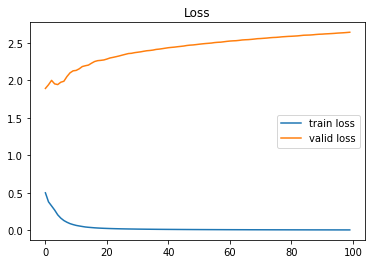

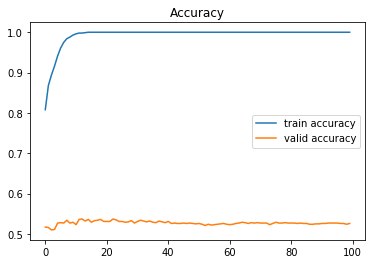

In [17]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢